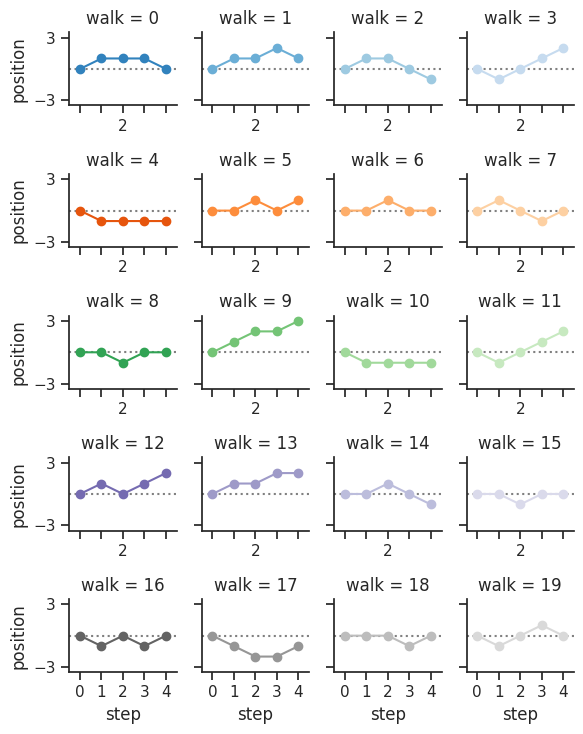

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
...,...,...,...
95,0,0,19
96,-1,1,19
97,0,2,19
98,1,3,19


In [26]:
#octree_nca = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_overkill5_OctreeNCASegmentation"
octree_nca = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_overkill6_OctreeNCASegmentation"
#octree_nca = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_copied_OctreeNCASegmentation"
m3d_nca = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_m3d_M3dSegmentation"
unet = r"/local/scratch/clmn1/octree_study/Experiments/new_prostate_unet_3d_8_UNetSegmentation"


augmentations = ["RandomGhosting", "RandomAnisotropy","RandomBiasField",
                 "RandomNoise", "RandomBlur",]
#augmentations = ["RandomGhosting", "RandomAnisotropy"]

augmentation_name = augmentations[1]

all_files = []
for augmentation_name in augmentations:
    for model in ["octree_nca", "unet", "m3d_nca"]:
        eval_file = pd.read_csv(f"{eval(model)}/eval/standard.csv", sep='\t')
        eval_file["severity"] = 0
        eval_file["model"] = model
        eval_file["augmentation"] = augmentation_name
        all_files.append(eval_file)
        for severity in range(1, 6):
            eval_file = pd.read_csv(f"{eval(model)}/eval/{augmentation_name}_{severity}.csv", sep='\t')
            eval_file["severity"] = severity
            eval_file["model"] = model
            eval_file["augmentation"] = augmentation_name
            all_files.append(eval_file)

all_files = pd.concat(all_files)

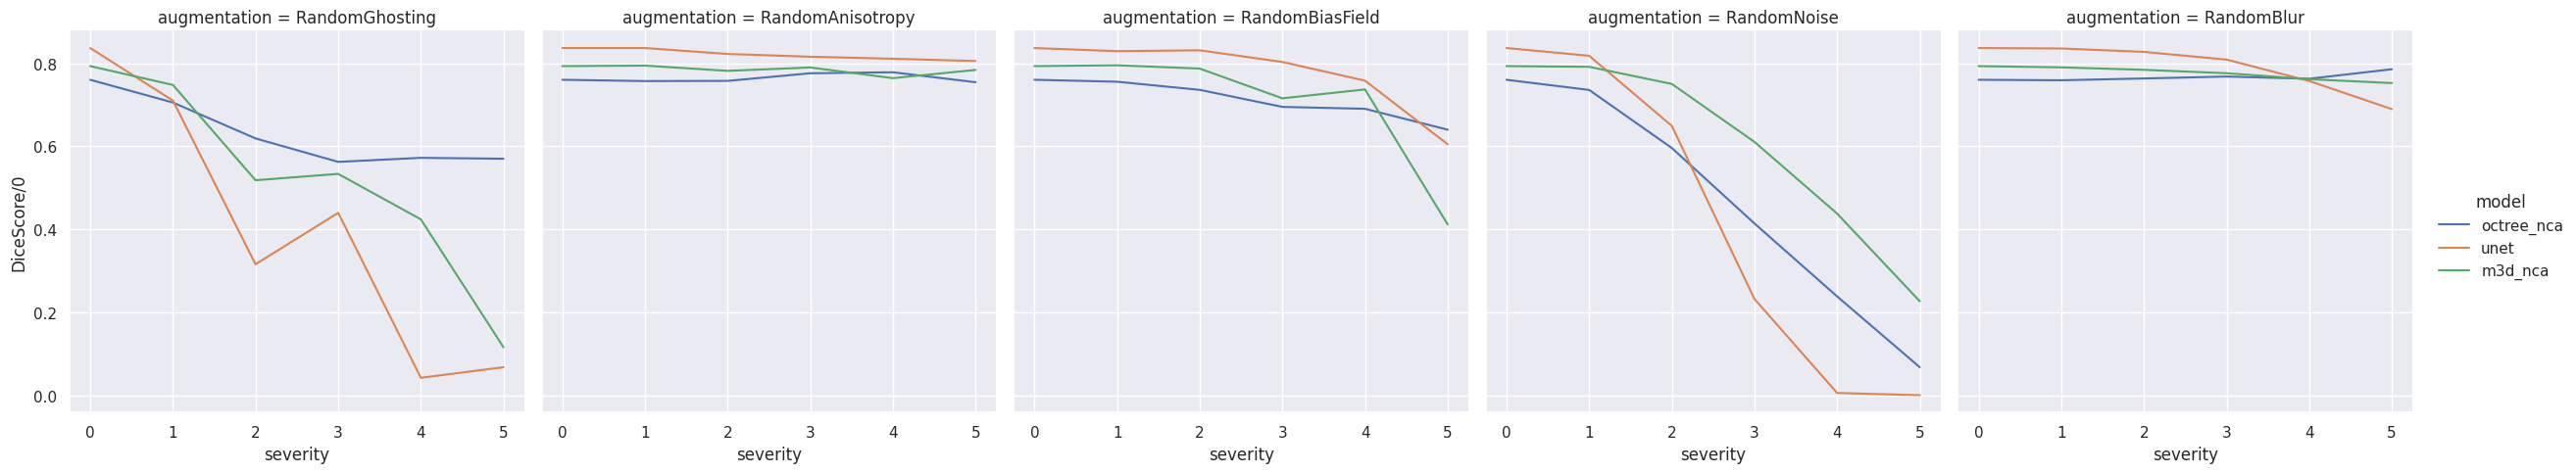

In [27]:
sns.set_theme(style="darkgrid")
sns.relplot(data=all_files, x="severity", y="DiceScore/0", hue="model", errorbar=None,
             col="augmentation", kind="line")